In [1]:
# Monte-Carlo playoff odds
# Generate my own playoff odds

# For now, I'm focusing on the mechanics of the simulation, and less so on the inputs (e.g., the projected team quality)
# So I'm using 538's win probabilities for each game, rather than computing my own

# I'm also using 538's results/schedule data, because it is so easy to use

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from playoff_odds import *

%matplotlib inline

In [2]:
(played, remain) = get_games()
played.shape, remain.shape

((2016, 26), (414, 26))

In [3]:
remain.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'rating1_pre', 'rating2_pre', 'pitcher1', 'pitcher2', 'pitcher1_rgs',
       'pitcher2_rgs', 'pitcher1_adj', 'pitcher2_adj', 'rating_prob1',
       'rating_prob2', 'rating1_post', 'rating2_post', 'score1', 'score2'],
      dtype='object')

In [4]:
pd.concat([remain['rating1_pre'], remain['rating2_pre']]).nunique()
# So if there are 30 distinct values here, these are the unadjusted team ratings (quality)


30

In [5]:
remain.query('team2=="BAL" and team1=="TOR"').T

,244,263,279
date,2022-09-18,2022-09-17,2022-09-16
season,2022,2022,2022
neutral,0,0,0
playoff,NaN,NaN,NaN
team1,TOR,TOR,TOR
team2,BAL,BAL,BAL
elo1_pre,1539.830047,1539.830047,1539.830047
elo2_pre,1505.146266,1505.146266,1505.146266
elo_prob1,0.583659,0.583659,0.583659
elo_prob2,0.416341,0.416341,0.416341


In [6]:

rating_diffs = remain['rating1_pre'] + remain['pitcher1_adj'] - remain['rating2_pre'] - remain['pitcher2_adj']
px.scatter((pd.concat([rating_diffs.rename('diff'), remain['rating_prob1']], axis=1)), x='diff', y='rating_prob1')

In [7]:
def p_from_diff(diff):
    return 1/(10**(-diff/400)+1)

In [8]:
p_from_diff(rating_diffs)
px.scatter((pd.concat([p_from_diff(rating_diffs+25).rename('p'), remain['rating_prob1']], axis=1)), x='p', y='rating_prob1')

# Exercise some functions that will be used in the simulation

In [9]:
compute_standings(played)

,W,L
LAD,92,42
HOU,87,48
NYM,85,50
ATL,84,51
NYY,81,54
STL,79,56
SEA,76,59
TBD,75,58
TOR,75,59
SDP,74,62


In [10]:


rand0 = get_randoms(0)
sim_rem_games(remain, rand0)

,W,L
NYM,23,4
HOU,19,8
LAD,18,10
NYY,18,9
MIN,17,12
TOR,17,11
PHI,17,11
ANA,17,10
STL,17,10
COL,17,9


In [11]:
cur_standings = compute_standings(played)
rem_standings = sim_rem_games(remain, rand0)
full_standings = cur_standings+rem_standings
full_standings

,W,L
ANA,76,86
ARI,72,90
ATL,98,64
BAL,84,78
BOS,77,85
CHC,66,96
CHW,82,80
CIN,67,95
CLE,86,76
COL,74,88


In [12]:
finish_one_season(cur_standings, remain, rand0)

,W,L,wpct,div,lg,rand,div_win,lg_rank
HOU,106,56,0.654321,ALW,A,0.441617,True,1
NYY,99,63,0.611111,ALE,A,0.817877,True,2
CLE,86,76,0.530864,ALC,A,0.228893,True,3
TOR,92,70,0.567901,ALE,A,0.707543,False,4
SEA,91,71,0.561728,ALW,A,0.192052,False,5
TBD,87,75,0.537037,ALE,A,0.714941,False,6
MIN,85,77,0.524691,ALC,A,0.664833,False,7
BAL,84,78,0.518519,ALE,A,0.322144,False,8
CHW,82,80,0.506173,ALC,A,0.484206,False,9
BOS,77,85,0.475309,ALE,A,0.545952,False,10


In [13]:
sim_results = sim_n_seasons(cur_standings, remain, 100)
sim_results

,,W,L,wpct,div,lg,rand,div_win,lg_rank
team,iter,,,,,,,,
HOU,0,106,56,0.654321,ALW,A,0.441617,True,1
NYY,0,99,63,0.611111,ALE,A,0.817877,True,2
CLE,0,86,76,0.530864,ALC,A,0.228893,True,3
TOR,0,92,70,0.567901,ALE,A,0.707543,False,4
SEA,0,91,71,0.561728,ALW,A,0.192052,False,5
...,...,...,...,...,...,...,...,...,...
CHC,99,71,91,0.438272,NLC,N,0.546382,False,11
CIN,99,69,93,0.425926,NLC,N,0.262473,False,12
FLA,99,65,97,0.401235,NLE,N,0.802086,False,13


In [14]:
# Count the number of div/wc/playoff appearances by team from a set of results
summarize_sim_results(sim_results)

,mean,max,min,1,2,3,4,5,6,div_wins,playoffs,champ_shares,home_game
team,,,,,,,,,,,,,
ANA,71.81,80,66,0,0,0,0,0,0,0,0,0.000,0.00
ARI,76.69,84,71,0,0,0,0,0,0,0,0,0.000,0.00
ATL,100.84,107,95,0,36,0,64,0,0,36,100,8.840,100.00
BAL,83.22,92,77,0,0,0,1,1,7,0,9,0.465,4.52
BOS,79.76,86,75,0,0,0,0,0,0,0,0,0.000,0.00
CHC,69.48,75,64,0,0,0,0,0,0,0,0,0.000,0.00
CHW,82.69,88,75,0,0,24,0,0,3,24,27,1.830,25.32
CIN,66.74,73,60,0,0,0,0,0,0,0,0,0.000,0.00
CLE,84.78,92,80,0,0,56,0,0,1,56,57,3.970,56.44


In [15]:
weights

{'champ_shares': {1: 0.135, 2: 0.13, 3: 0.07, 4: 0.065, 5: 0.05, 6: 0.05},
 'home_game': {1: 1, 2: 1, 3: 1, 4: 1, 5: 0.44, 6: 0.44}}

In [16]:
sim_results.groupby('iter')['W'].max().median()

111.0

In [17]:
summary = summarize_sim_results(sim_results)
print(summary.sort_values('champ_shares', ascending=False).to_string())

        mean  max  min    1   2    3   4   5   6  div_wins  playoffs  champ_shares  home_game
team                                                                                         
HOU   103.66  111   98  100   0    0   0   0   0       100       100        13.500     100.00
LAD   110.43  115  105  100   0    0   0   0   0       100       100        13.500     100.00
NYY    96.43  102   88    0  88    0   6   5   1        88       100        12.130      96.64
NYM   101.87  108   97    0  64    0  36   0   0        64       100        10.660     100.00
ATL   100.84  107   95    0  36    0  64   0   0        36       100         8.840     100.00
STL    94.95  100   89    0   0  100   0   0   0       100       100         7.000     100.00
TOR    90.43   99   82    0  11    0  20  29  34        11        94         5.880      58.72
SEA    91.94   98   85    0   0    0  57  33  10         0       100         5.855      75.92
TBD    89.44   97   82    0   1    0  16  32  44         1  

In [18]:
tms = ('SDP', 'PHI')
sim_results.query('lg_rank==4 and team in @tms')['W'].groupby('team').mean()

Series([], Name: W, dtype: float64)

In [19]:

phils4 = sim_results.query('lg_rank==4 and team=="PHI"').reset_index()['iter'].values
sim_results.query('iter in @phils4 and div=="NLE" and div_win').reset_index()['team'].value_counts()


Series([], Name: team, dtype: int64)

In [20]:
tms = ('SDP', 'PHI')
sim_results.query('W>=94 and team in @tms').reset_index()['team'].value_counts()

SDP    2
Name: team, dtype: int64

In [21]:
os_playoffs = sim_results.query('team=="BAL" and lg_rank<=6').reset_index()['iter'].values
sim_results.query('iter in @os_playoffs and lg=="A" and lg_rank==7').reset_index()['team'].value_counts()

TOR    4
TBD    3
MIN    1
CHW    1
Name: team, dtype: int64

In [22]:
tms= ['SEA', 'NYY']
sim_results.query("team in @tms")['lg_rank'].unstack().T.product(axis=1).value_counts()

8     52
10    29
20     8
12     7
24     3
30     1
dtype: int64

In [23]:
# How many games does each team win in each seeding?
sim_results.query('lg_rank <= 6').groupby(['team', 'lg_rank'])['W'].mean().unstack()

lg_rank,1,2,3,4,5,6
team,,,,,,
ATL,NaN,102.472222,NaN,99.921875,NaN,NaN
BAL,NaN,NaN,NaN,92.000000,90.000000,87.142857
CHW,NaN,NaN,85.541667,NaN,NaN,84.666667
CLE,NaN,NaN,86.500000,NaN,NaN,86.000000
HOU,103.66,NaN,NaN,NaN,NaN,NaN
LAD,110.43,NaN,NaN,NaN,NaN,NaN
MIL,NaN,NaN,NaN,NaN,89.000000,86.620690
MIN,NaN,NaN,85.900000,NaN,NaN,NaN
NYM,NaN,103.078125,NaN,99.722222,NaN,NaN


In [24]:
remain.tail(10)


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
404,2022-09-06,2022,0,NaN,ANA,DET,1480.038675,1440.512811,0.590416,0.409584,...,43.655527,51.974057,-41.234704,12.526888,0.528912,0.471088,NaN,NaN,NaN,NaN
405,2022-09-06,2022,0,NaN,COL,MIL,1454.332165,1515.626930,0.446534,0.553466,...,46.959022,57.274584,-14.817605,16.774696,0.383438,0.616562,NaN,NaN,NaN,NaN
406,2022-09-06,2022,0,NaN,KCR,CLE,1456.656818,1510.563595,0.457067,0.542933,...,46.261317,60.174261,-9.978581,32.041291,0.402345,0.597655,NaN,NaN,NaN,NaN
407,2022-09-06,2022,0,NaN,HOU,TEX,1580.170158,1469.047380,0.685212,0.314788,...,58.264302,49.836736,6.927441,-3.293093,0.686206,0.313794,NaN,NaN,NaN,NaN
408,2022-09-06,2022,0,NaN,STL,WSN,1552.224657,1442.156615,0.683901,0.316099,...,50.443530,47.223035,-8.455611,6.581118,0.639728,0.360272,NaN,NaN,NaN,NaN
409,2022-09-06,2022,0,NaN,CHC,CIN,1462.103655,1469.471684,0.523917,0.476083,...,50.576665,48.971900,0.997523,-4.609393,0.534801,0.465199,NaN,NaN,NaN,NaN
410,2022-09-06,2022,0,NaN,BAL,TOR,1505.146266,1539.830047,0.484630,0.515370,...,50.463074,47.854467,-3.752287,-23.145871,0.483652,0.516348,NaN,NaN,NaN,NaN
411,2022-09-06,2022,0,NaN,PHI,FLA,1521.202073,1454.287326,0.627930,0.372070,...,59.797332,51.417775,23.302133,-9.428363,0.663523,0.336477,NaN,NaN,NaN,NaN
412,2022-09-06,2022,0,NaN,TBD,BOS,1552.855041,1498.234307,0.611252,0.388748,...,47.400000,51.296494,2.750912,-1.613766,0.583588,0.416412,NaN,NaN,NaN,NaN
413,2022-09-06,2022,0,NaN,PIT,NYM,1419.311501,1550.547834,0.350395,0.649605,...,47.783377,51.711977,-0.244601,-16.399350,0.369578,0.630422,NaN,NaN,NaN,NaN


In [25]:
sim_both_ways(cur_standings, remain.index.values[-1], 100, remain)

team
ANA    0.000
ARI    0.000
ATL    0.585
BAL    0.000
BOS    0.000
CHC    0.000
CHW    0.000
CIN    0.000
CLE    0.000
COL    0.000
DET    0.000
FLA    0.000
HOU    0.000
KCR    0.000
LAD    0.000
MIL    0.000
MIN    0.000
NYM   -0.585
NYY    0.000
OAK    0.000
PHI    0.000
PIT    0.000
SDP    0.000
SEA    0.000
SFG    0.000
STL    0.000
TBD    0.000
TEX    0.000
TOR    0.000
WSN    0.000
Name: 413, dtype: float64

In [26]:
next_dt = remain['date'].min()
game_ids = remain.query('date == @next_dt').index.values
game_ids

array([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413])

In [27]:
results = pd.DataFrame()
for i in range(2, 3):
    num_iterations = 10 ** i
    print(f'Starting {num_iterations} iterations')
    results = pd.concat([sim_both_ways(cur_standings, game_id, num_iterations, remain) for game_id in game_ids], axis=1)
    print(results)

Starting 100 iterations
      400    401  402   403  404  405   406    407   408  409    410  411  \
team                                                                        
ANA   0.0  0.000  0.0  0.00  0.0  0.0  0.00  0.000  0.00  0.0  0.000  0.0   
ARI   0.0  0.000  0.0  0.00  0.0  0.0  0.00  0.000  0.00  0.0  0.000  0.0   
ATL   0.0  0.000  0.0 -0.58  0.0  0.0  0.00  0.000  0.00  0.0  0.000  0.0   
BAL   0.0  0.000  0.0  0.00  0.0  0.0  0.00  0.000  0.00  0.0  0.350  0.0   
BOS   0.0  0.050  0.0  0.00  0.0  0.0  0.00  0.000  0.00  0.0  0.000  0.0   
CHC   0.0  0.000  0.0  0.00  0.0  0.0  0.00  0.000  0.00  0.0  0.000  0.0   
CHW   0.0 -0.590  0.0  0.00  0.0  0.0  0.28  0.000  0.00  0.0  0.000  0.0   
CIN   0.0  0.000  0.0  0.00  0.0  0.0  0.00  0.000  0.00  0.0  0.000  0.0   
CLE   0.0  0.280  0.0  0.00  0.0  0.0 -0.61  0.000  0.00  0.0  0.000  0.0   
COL   0.0  0.000  0.0  0.00  0.0  0.0  0.00  0.000  0.00  0.0  0.000  0.0   
DET   0.0  0.000  0.0  0.00  0.0  0.0  0.00  0.000  

In [28]:
game_descs = remain.apply(lambda x: f'{x.team2}\n@{x.team1}', axis=1)
game_descs.to_dict()

{0: 'COL\n@LAD',
 1: 'DET\n@SEA',
 2: 'SFG\n@SDP',
 3: 'WSN\n@NYM',
 4: 'ARI\n@MIL',
 5: 'PHI\n@HOU',
 6: 'ATL\n@FLA',
 7: 'KCR\n@CLE',
 8: 'CHC\n@CIN',
 9: 'MIN\n@CHW',
 10: 'TBD\n@BOS',
 11: 'NYY\n@TEX',
 12: 'STL\n@PIT',
 13: 'TOR\n@BAL',
 14: 'ANA\n@OAK',
 15: 'COL\n@LAD',
 16: 'DET\n@SEA',
 17: 'SFG\n@SDP',
 18: 'ANA\n@OAK',
 19: 'PHI\n@HOU',
 20: 'MIN\n@CHW',
 21: 'NYY\n@TEX',
 22: 'ARI\n@MIL',
 23: 'WSN\n@NYM',
 24: 'TBD\n@BOS',
 25: 'TOR\n@BAL',
 26: 'ATL\n@FLA',
 27: 'CHC\n@CIN',
 28: 'STL\n@PIT',
 29: 'DET\n@SEA',
 30: 'KCR\n@CLE',
 31: 'NYY\n@TEX',
 32: 'COL\n@LAD',
 33: 'DET\n@SEA',
 34: 'SFG\n@SDP',
 35: 'ANA\n@OAK',
 36: 'PHI\n@HOU',
 37: 'MIN\n@CHW',
 38: 'ARI\n@MIL',
 39: 'WSN\n@NYM',
 40: 'TBD\n@BOS',
 41: 'NYY\n@TEX',
 42: 'TOR\n@BAL',
 43: 'ATL\n@FLA',
 44: 'CHC\n@CIN',
 45: 'STL\n@PIT',
 46: 'KCR\n@CLE',
 47: 'OAK\n@SEA',
 48: 'CHW\n@SDP',
 49: 'COL\n@LAD',
 50: 'TEX\n@ANA',
 51: 'ARI\n@SFG',
 52: 'CIN\n@CHC',
 53: 'PIT\n@STL',
 54: 'FLA\n@MIL',
 55: 'TBD\n@HOU',
 5

In [29]:
for_graphing = results/(num_iterations/100)
for_graphing = for_graphing.rename(columns=game_descs.to_dict())
for_graphing


,SFG\n@LAD,CHW\n@SEA,ARI\n@SDP,ATL\n@OAK,DET\n@ANA,MIL\n@COL,CLE\n@KCR,TEX\n@HOU,WSN\n@STL,CIN\n@CHC,TOR\n@BAL,FLA\n@PHI,BOS\n@TBD,NYM\n@PIT
team,,,,,,,,,,,,,,
ANA,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.000,0.00,0.0,0.000,0.0,0.00,0.000
ARI,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.000,0.00,0.0,0.000,0.0,0.00,0.000
ATL,0.0,0.000,0.0,-0.58,0.0,0.0,0.00,0.000,0.00,0.0,0.000,0.0,0.00,0.585
BAL,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.000,0.00,0.0,0.350,0.0,-0.05,0.000
BOS,0.0,0.050,0.0,0.00,0.0,0.0,0.00,0.000,0.00,0.0,0.000,0.0,0.00,0.000
CHC,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.000,0.00,0.0,0.000,0.0,0.00,0.000
CHW,0.0,-0.590,0.0,0.00,0.0,0.0,0.28,0.000,0.00,0.0,0.000,0.0,-0.10,0.000
CIN,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.000,0.00,0.0,0.000,0.0,0.00,0.000
CLE,0.0,0.280,0.0,0.00,0.0,0.0,-0.61,0.000,0.00,0.0,0.000,0.0,-0.05,0.000


In [30]:
teamwise_leverage = for_graphing.abs().sum(axis=1).sort_values(ascending=False)
teamwise_leverage


team
ATL    1.165
NYM    1.105
MIL    1.020
PHI    1.000
CHW    0.970
CLE    0.940
SDP    0.800
TOR    0.725
TBD    0.530
MIN    0.490
BAL    0.400
SEA    0.300
NYY    0.230
STL    0.080
BOS    0.050
HOU    0.005
TEX    0.000
SFG    0.000
PIT    0.000
ANA    0.000
OAK    0.000
ARI    0.000
LAD    0.000
KCR    0.000
FLA    0.000
DET    0.000
COL    0.000
CIN    0.000
CHC    0.000
WSN    0.000
dtype: float64

<AxesSubplot:ylabel='team'>

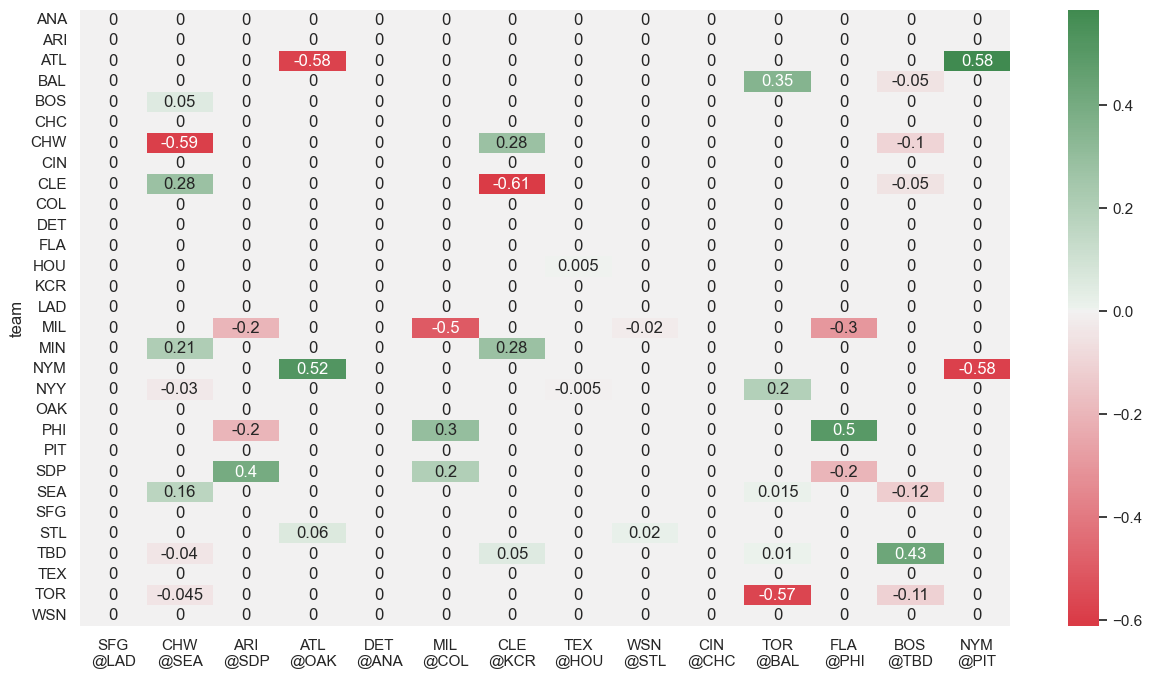

In [31]:
sns.set(rc = {'figure.figsize':(15,8)})
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(for_graphing, cmap=cmap, annot=True, center=0)

In [32]:
(abs(results)).sum(axis=0).sort_values()

400    0.00
404    0.00
409    0.00
407    0.01
408    0.04
402    0.80
412    0.86
405    1.00
411    1.00
410    1.14
403    1.16
413    1.17
406    1.22
401    1.41
dtype: float64

In [33]:
results.sum(axis=1).sum()

-8.881784197001252e-16

In [34]:
gamewise_leverage = for_graphing.abs().sum(axis=0).sort_values(ascending=False)
gamewise_leverage

CHW\n@SEA    1.41
CLE\n@KCR    1.22
NYM\n@PIT    1.17
ATL\n@OAK    1.16
TOR\n@BAL    1.14
MIL\n@COL    1.00
FLA\n@PHI    1.00
BOS\n@TBD    0.86
ARI\n@SDP    0.80
WSN\n@STL    0.04
TEX\n@HOU    0.01
SFG\n@LAD    0.00
DET\n@ANA    0.00
CIN\n@CHC    0.00
dtype: float64